In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals, unicode_literals

!pip install -q tf-nightly-2.0-preview
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

ERROR: Could not find a version that satisfies the requirement tf-nightly-2.0-preview (from versions: none)
ERROR: No matching distribution found for tf-nightly-2.0-preview


2.1.0


In [2]:
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    # 0으로 채워진 (len(sequences), dimension) 크기의 행렬을 만듭니다
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # results[i]의 특정 인덱스만 1로 설정합니다
    return results


train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

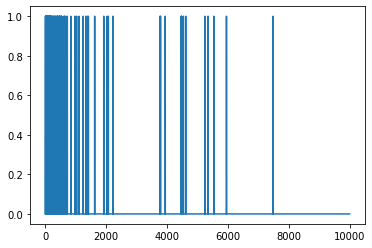

In [3]:
plt.plot(train_data[0])

### Normal Model

In [4]:
baseline_model = keras.Sequential([
    # `.summary` 메서드 때문에 `input_shape`가 필요합니다
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [5]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 7s - loss: 0.4860 - accuracy: 0.8024 - binary_crossentropy: 0.4860 - val_loss: 0.3329 - val_accuracy: 0.8776 - val_binary_crossentropy: 0.3329
Epoch 2/20
25000/25000 - 4s - loss: 0.2491 - accuracy: 0.9102 - binary_crossentropy: 0.2491 - val_loss: 0.2892 - val_accuracy: 0.8835 - val_binary_crossentropy: 0.2892
Epoch 3/20
25000/25000 - 3s - loss: 0.1826 - accuracy: 0.9364 - binary_crossentropy: 0.1826 - val_loss: 0.2881 - val_accuracy: 0.8848 - val_binary_crossentropy: 0.2881
Epoch 4/20
25000/25000 - 3s - loss: 0.1466 - accuracy: 0.9508 - binary_crossentropy: 0.1466 - val_loss: 0.3075 - val_accuracy: 0.8797 - val_binary_crossentropy: 0.3075
Epoch 5/20
25000/25000 - 3s - loss: 0.1214 - accuracy: 0.9609 - binary_crossentropy: 0.1214 - val_loss: 0.3342 - val_accuracy: 0.8748 - val_binary_crossentropy: 0.3342
Epoch 6/20
25000/25000 - 4s - loss: 0.1009 - accuracy: 0.9681 - binary_crossentropy: 0.1009 - val_loss: 0.3663

### Small model

In [6]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

smaller_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [7]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 4s - loss: 0.5436 - accuracy: 0.7569 - binary_crossentropy: 0.5436 - val_loss: 0.4078 - val_accuracy: 0.8615 - val_binary_crossentropy: 0.4078
Epoch 2/20
25000/25000 - 4s - loss: 0.3219 - accuracy: 0.8972 - binary_crossentropy: 0.3219 - val_loss: 0.3257 - val_accuracy: 0.8802 - val_binary_crossentropy: 0.3257
Epoch 3/20
25000/25000 - 3s - loss: 0.2481 - accuracy: 0.9188 - binary_crossentropy: 0.2481 - val_loss: 0.2971 - val_accuracy: 0.8851 - val_binary_crossentropy: 0.2971
Epoch 4/20
25000/25000 - 3s - loss: 0.2078 - accuracy: 0.9324 - binary_crossentropy: 0.2078 - val_loss: 0.2857 - val_accuracy: 0.8876 - val_binary_crossentropy: 0.2857
Epoch 5/20
25000/25000 - 3s - loss: 0.1807 - accuracy: 0.9414 - binary_crossentropy: 0.1807 - val_loss: 0.2876 - val_accuracy: 0.8845 - val_binary_crossentropy: 0.2876
Epoch 6/20
25000/25000 - 3s - loss: 0.1604 - accuracy: 0.9486 - binary_crossentropy: 0.1604 - val_loss: 0.2886

### Big Model

In [8]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [9]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 14s - loss: 0.3496 - accuracy: 0.8478 - binary_crossentropy: 0.3496 - val_loss: 0.2891 - val_accuracy: 0.8824 - val_binary_crossentropy: 0.2891
Epoch 2/20
25000/25000 - 13s - loss: 0.1422 - accuracy: 0.9497 - binary_crossentropy: 0.1422 - val_loss: 0.3279 - val_accuracy: 0.8733 - val_binary_crossentropy: 0.3279
Epoch 3/20
25000/25000 - 13s - loss: 0.0464 - accuracy: 0.9868 - binary_crossentropy: 0.0464 - val_loss: 0.4431 - val_accuracy: 0.8701 - val_binary_crossentropy: 0.4431
Epoch 4/20
25000/25000 - 13s - loss: 0.0064 - accuracy: 0.9992 - binary_crossentropy: 0.0064 - val_loss: 0.5825 - val_accuracy: 0.8694 - val_binary_crossentropy: 0.5825
Epoch 5/20
25000/25000 - 13s - loss: 0.0013 - accuracy: 1.0000 - binary_crossentropy: 0.0013 - val_loss: 0.6652 - val_accuracy: 0.8702 - val_binary_crossentropy: 0.6652
Epoch 6/20
25000/25000 - 13s - loss: 2.4608e-04 - accuracy: 1.0000 - binary_crossentropy: 2.4608e-04 - va

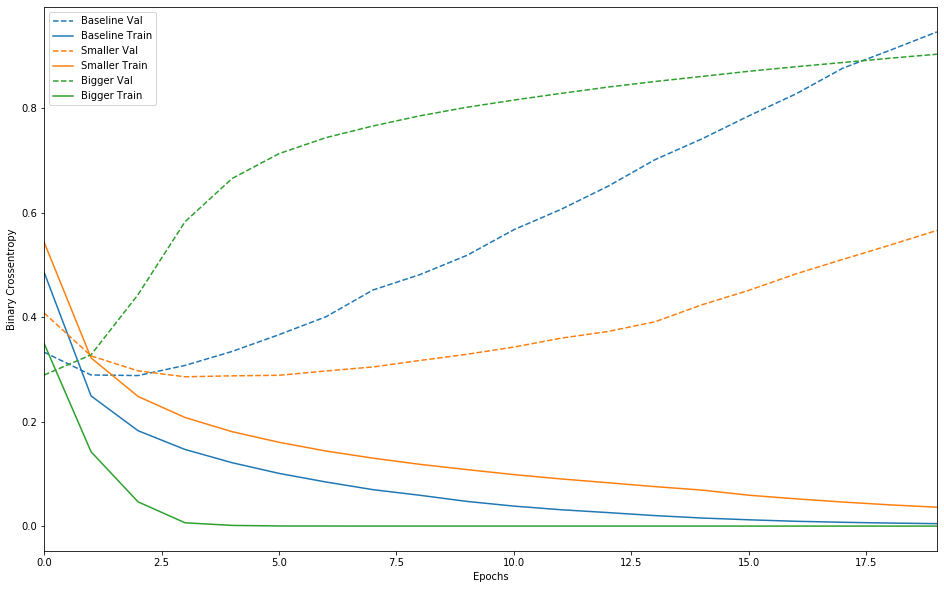

In [12]:
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))

  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

### 실선: 훈련손실. 점선: 검증손실.  (낮은 검증 손실이 더 좋은 모델)
* **작은 네트워크**가 **기준 모델**보다 더 늦게 **과대적합**이 시작
* **큰 네트워크**는 에포크1 이후에 과대적합 시작, 극심한 과대적합
* 네트워크 용량이 많을수록 훈련세트를 더 빠르게 모델링 가능(**훈련손실**이 낮아짐) / 더 쉽게 과대적합됨(**훈련손실**과 **검증손실** 사이에 큰 차이 발생)

## Weight Regularization

In [13]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 13s - loss: 0.5287 - accuracy: 0.7875 - binary_crossentropy: 0.4889 - val_loss: 0.3873 - val_accuracy: 0.8775 - val_binary_crossentropy: 0.3458
Epoch 2/20
25000/25000 - 7s - loss: 0.3078 - accuracy: 0.9120 - binary_crossentropy: 0.2616 - val_loss: 0.3363 - val_accuracy: 0.8868 - val_binary_crossentropy: 0.2869
Epoch 3/20
25000/25000 - 3s - loss: 0.2536 - accuracy: 0.9303 - binary_crossentropy: 0.2018 - val_loss: 0.3384 - val_accuracy: 0.8870 - val_binary_crossentropy: 0.2846
Epoch 4/20
25000/25000 - 4s - loss: 0.2287 - accuracy: 0.9422 - binary_crossentropy: 0.1733 - val_loss: 0.3510 - val_accuracy: 0.8818 - val_binary_crossentropy: 0.2944
Epoch 5/20
25000/25000 - 4s - loss: 0.2131 - accuracy: 0.9478 - binary_crossentropy: 0.1551 - val_loss: 0.3657 - val_accuracy: 0.8770 - val_binary_crossentropy: 0.3068
Epoch 6/20
25000/25000 - 3s - loss: 0.2009 - accuracy: 0.9535 - binary_crossentropy: 0.1411 - val_loss: 0.379

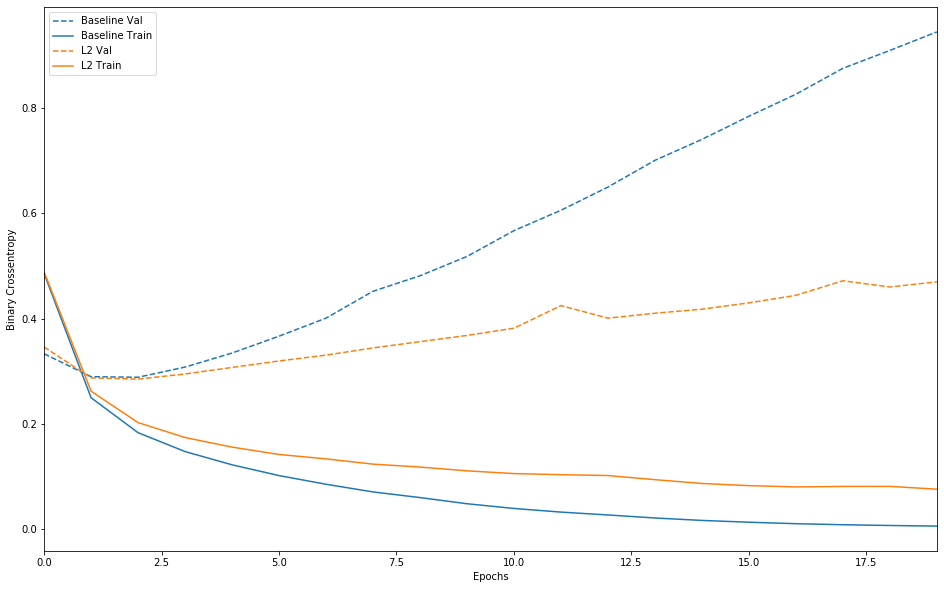

In [14]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

## Dropout

In [15]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 5s - loss: 0.6044 - accuracy: 0.6618 - binary_crossentropy: 0.6044 - val_loss: 0.4511 - val_accuracy: 0.8601 - val_binary_crossentropy: 0.4511
Epoch 2/20
25000/25000 - 3s - loss: 0.4244 - accuracy: 0.8324 - binary_crossentropy: 0.4244 - val_loss: 0.3308 - val_accuracy: 0.8799 - val_binary_crossentropy: 0.3308
Epoch 3/20
25000/25000 - 3s - loss: 0.3349 - accuracy: 0.8822 - binary_crossentropy: 0.3349 - val_loss: 0.2922 - val_accuracy: 0.8893 - val_binary_crossentropy: 0.2922
Epoch 4/20
25000/25000 - 3s - loss: 0.2756 - accuracy: 0.9079 - binary_crossentropy: 0.2756 - val_loss: 0.2779 - val_accuracy: 0.8886 - val_binary_crossentropy: 0.2779
Epoch 5/20
25000/25000 - 3s - loss: 0.2367 - accuracy: 0.9226 - binary_crossentropy: 0.2367 - val_loss: 0.2813 - val_accuracy: 0.8867 - val_binary_crossentropy: 0.2813
Epoch 6/20
25000/25000 - 3s - loss: 0.2100 - accuracy: 0.9318 - binary_crossentropy: 0.2100 - val_loss: 0.3037

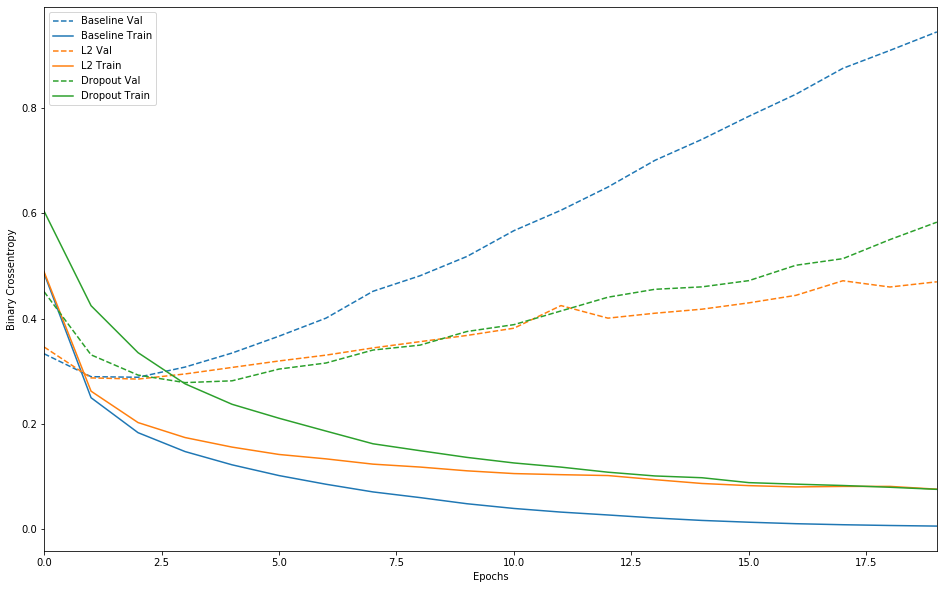

In [17]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history),
              ('dropout', dpt_model_history)])

## 과대적합 방지 
* 더 많은 훈련 데이터
* 네트워크의 용량 줄이기
* 가중치 규제 추가
* 드롭아웃 추가